# Importazione Librerie

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Visualizzazione di un Singolo file Audio

In [2]:
random_file_name = "./blues.00000.wav"

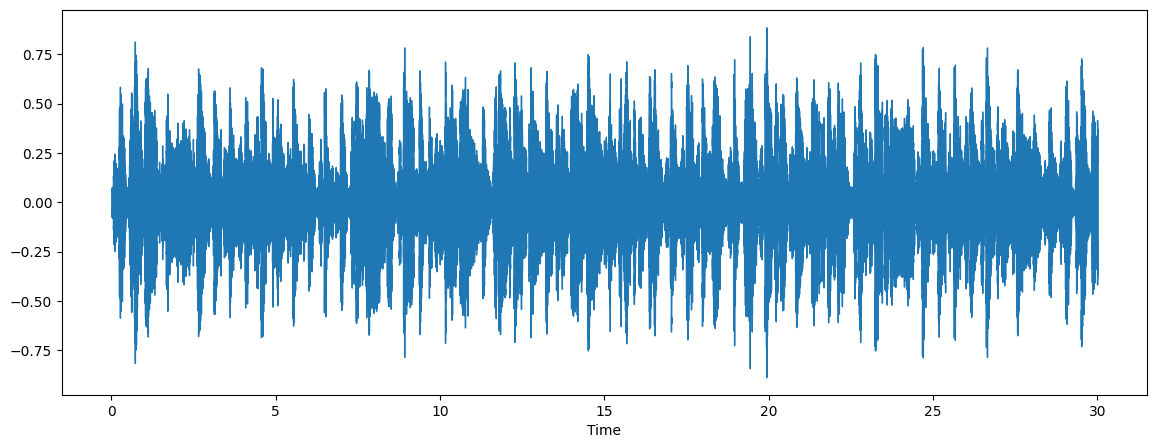

In [3]:
y, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [4]:
y.shape

(1323588,)

In [5]:
y

array([ 0.00734921,  0.01335782,  0.01657649, ..., -0.07293832,
       -0.06308185, -0.03151622], dtype=float32)

# Riproduci l'Audio

In [6]:
from IPython.display import Audio
Audio(data=y, rate=sr)

# Visualizzazione di chunk di Audio

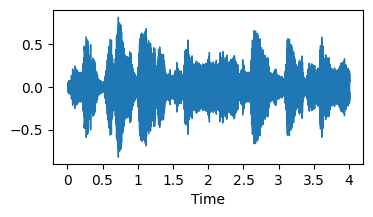

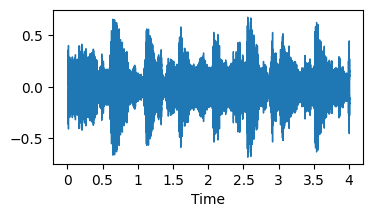

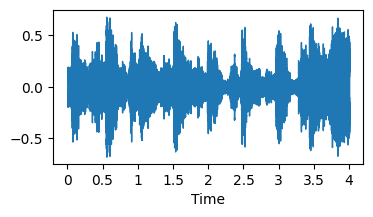

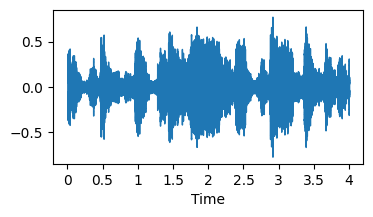

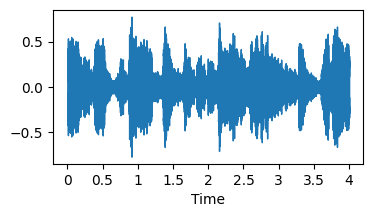

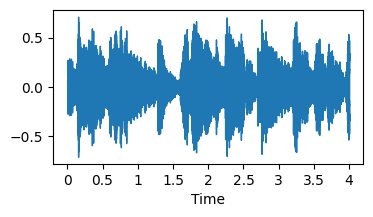

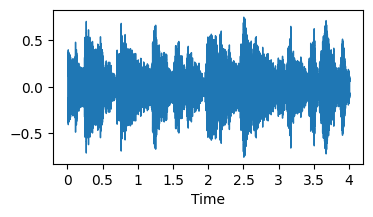

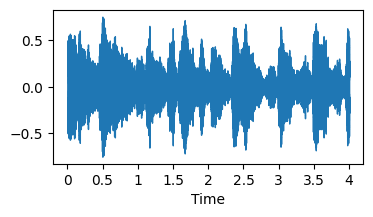

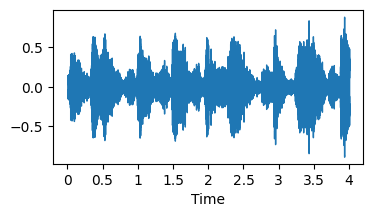

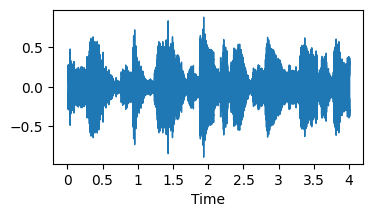

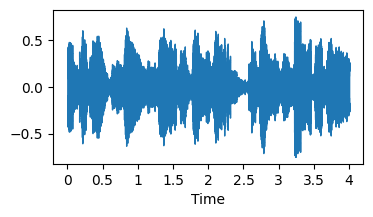

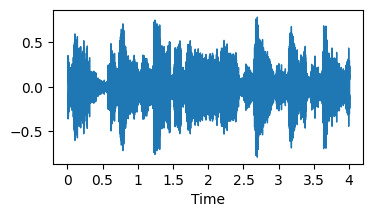

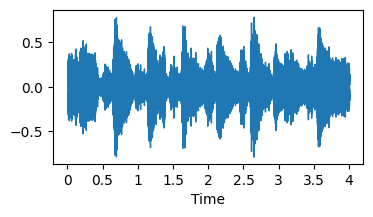

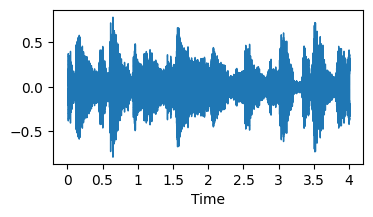

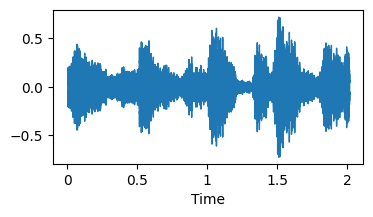

In [7]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=None) # sr=None mantiene il campionamento originale

# Definisce la durata di ciascun chunk e overlap
chunk_duration = 4
overlap_duration = 2

# Converte la durata in campioni
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calcola il numero di chunk
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Itera attraverso ogni chunk
for i in range(num_chunks):
    # Calcola gli indici di inizio e fine chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    # Estrai l'audio dei singoli chunk
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

## Visualizzazione Spettrogramma Mel

In [8]:
# Plot dello spettrogramma Mel dell'intero file audio
def plot_melspectrogram(y, sr):
    # Computa lo spettrogramma
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Conversione in decibel (in scala logaritmica)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualizza lo spettrogramma
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spettrogramma Mel")
    plt.tight_layout()
    plt.show()

In [9]:
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=44100)

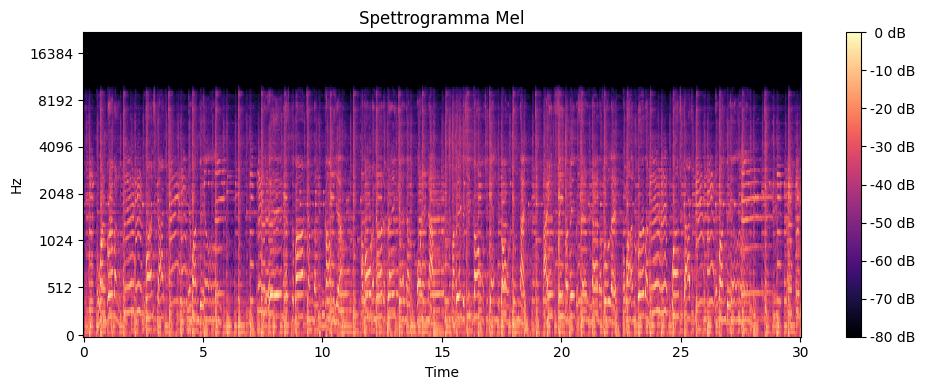

In [10]:
plot_melspectrogram(y, sr)

In [11]:
def plot_melspectrogram_chunks(y, sr):
    # Definisce la durata di ogni chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    # Converte la durata in campioni
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    # Calcola il numero di chunk
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Itera attraverso ogni chunk
    for i in range(num_chunks):
        # Calcola gli indici di inizio e fine chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        # Estrai l'audio dei singoli chunk
        chunk = y[start:end]
        # Creazione spettrogramma Mel
        spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        # Visualizzazione spettrogramma Mel
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        title = "Spettrogramma Mel - Chunk n." + str(i + 1)
        plt.title(title)
        plt.tight_layout()
        plt.show()

In [12]:
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=44100)

(128, 345)


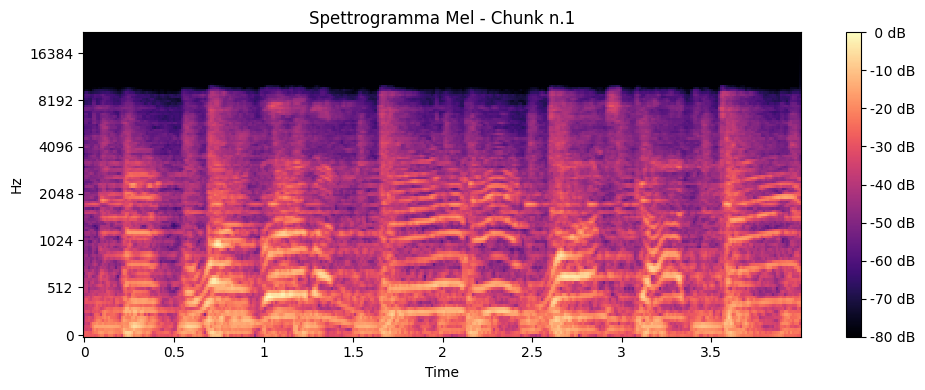

(128, 345)


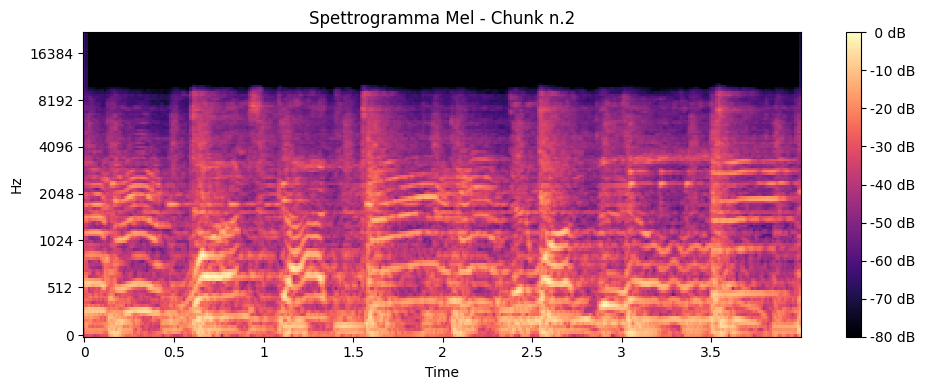

(128, 345)


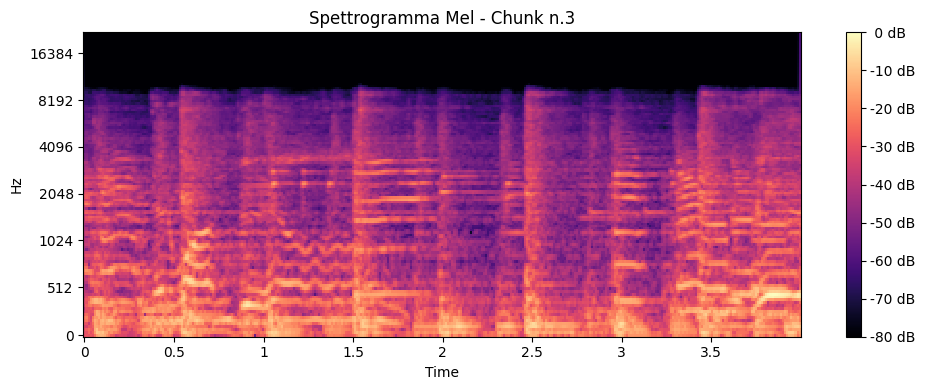

(128, 345)


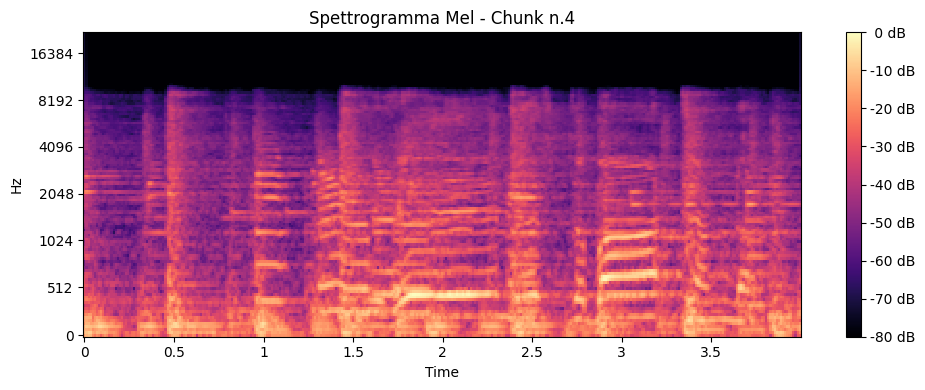

(128, 345)


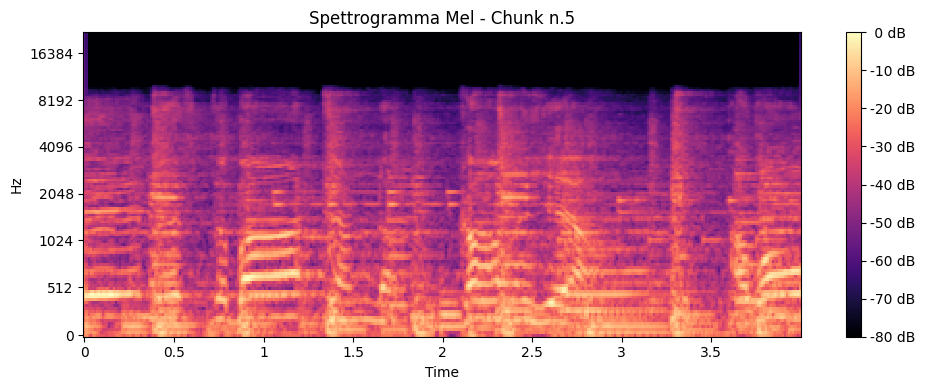

(128, 345)


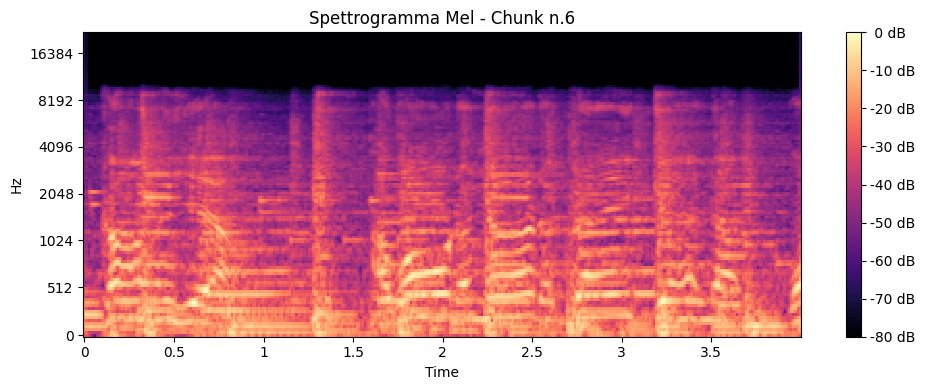

(128, 345)


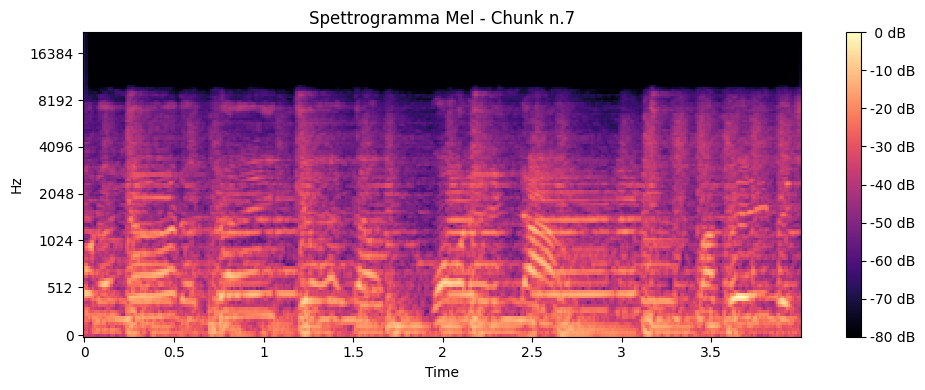

(128, 345)


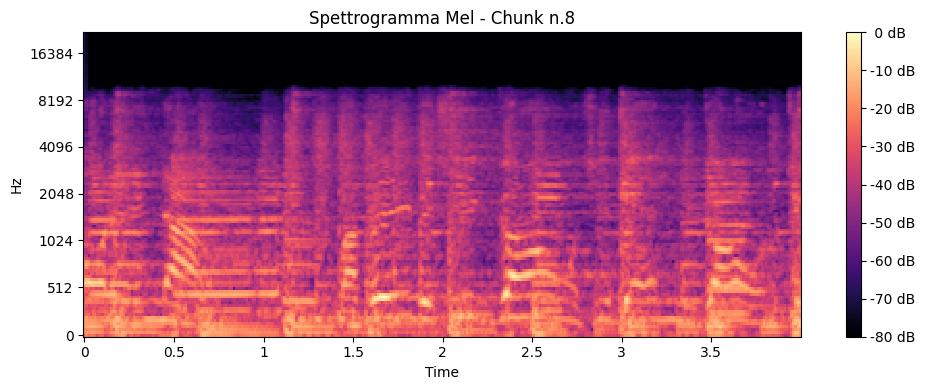

(128, 345)


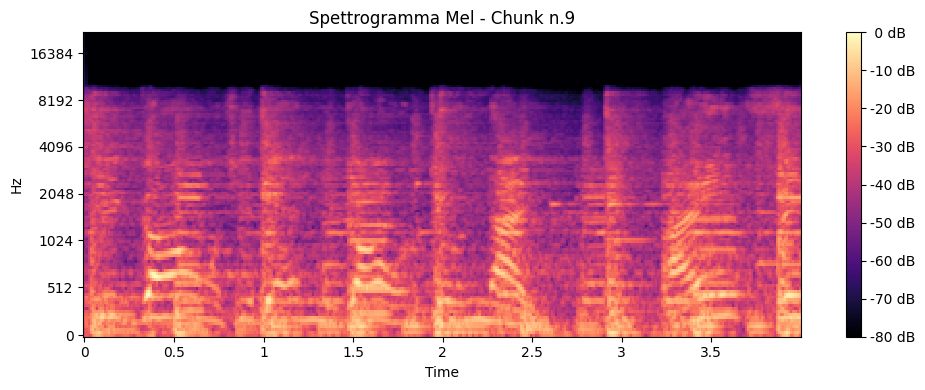

(128, 345)


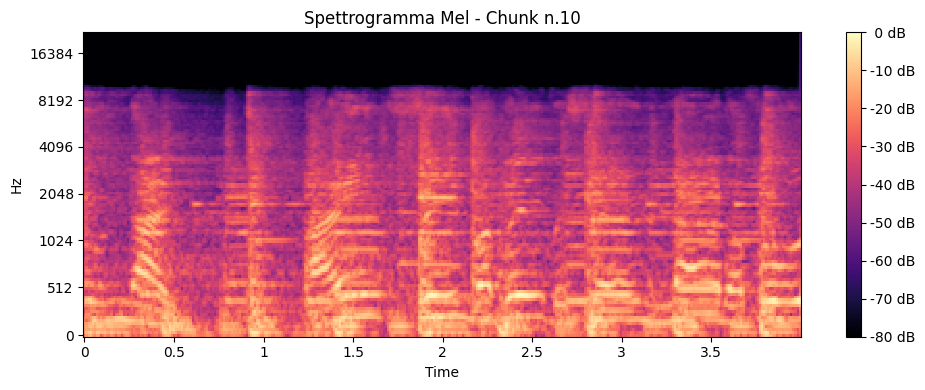

(128, 345)


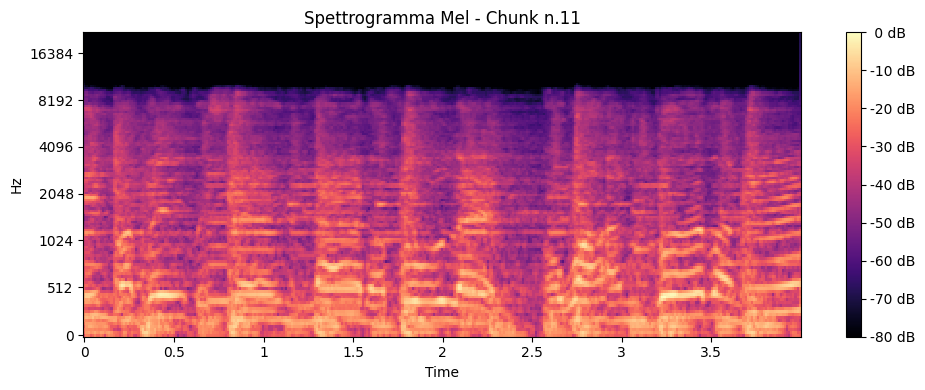

(128, 345)


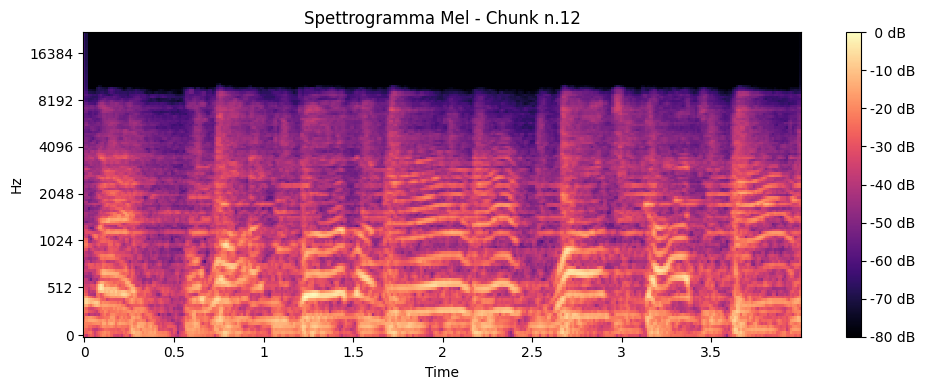

(128, 345)


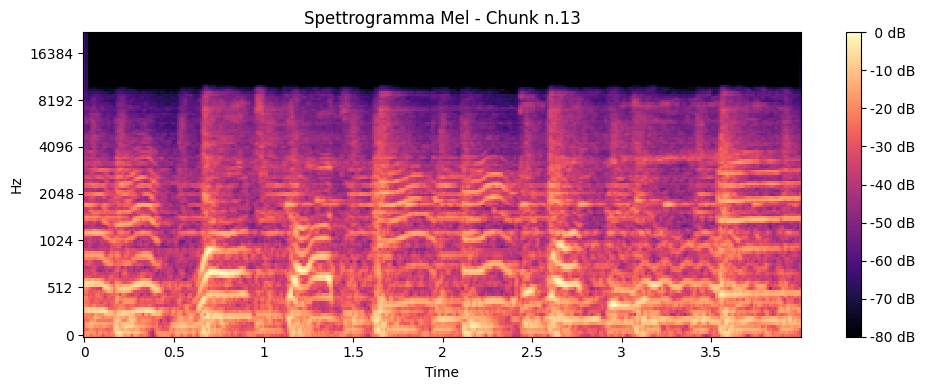

(128, 345)


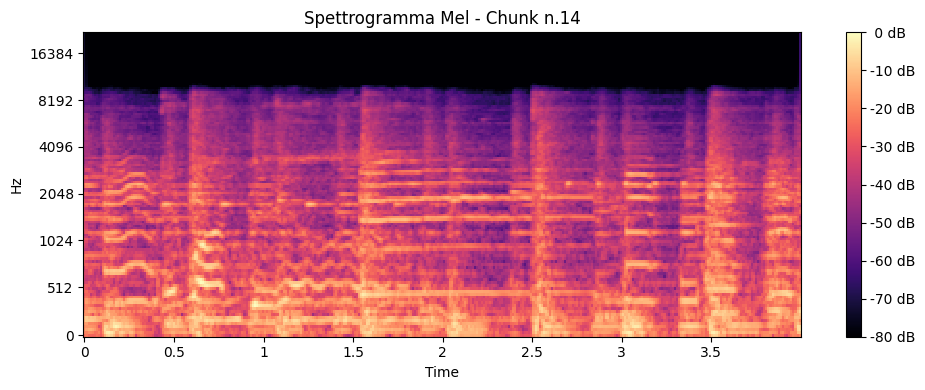

(128, 174)


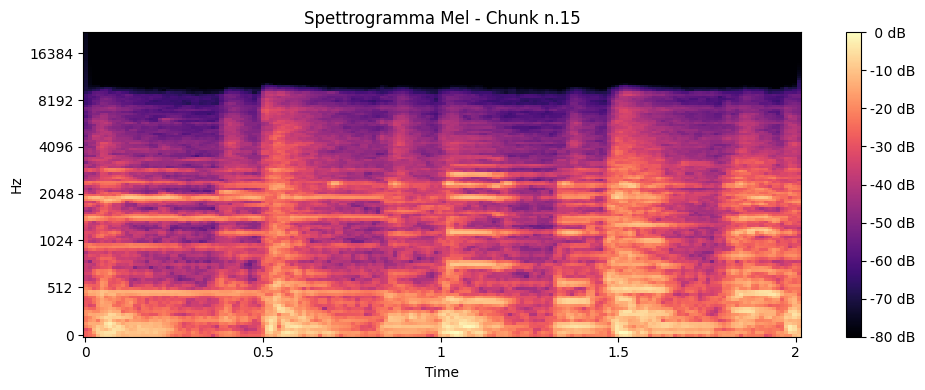

In [13]:
plot_melspectrogram_chunks(y, sr)

## Preprocessing dei Dati

In [14]:
data_dir = "../Dataset/Data/genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [15]:
from tensorflow.image import resize
# Carica ed effetua il preprocessing dei dati audio
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(".wav"):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Preprocessing
                # Definisce la durata di ogni chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                # Converte la durata in campioni
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calcola il numero di chunk
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Itera attraverso ogni chunk
                for i in range(num_chunks):
                    # Calcola gli indici di inizio e fine chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    # Estrai l'audio dei singoli chunk
                    chunk = audio_data[start:end]
                    # Creazione spettrogramma Mel
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    # Ridimensiona matrice nel formato fornito dalla variabile target_shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape) 
                    # Concatena i dati in lista
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    # Output restituito
    return np.array(data), np.array(labels)

In [16]:
corrupted_files = []
for root, dirs, files in os.walk(data_dir):
    for filename in files:
        if filename.endswith(".wav"):
            file_path = os.path.join(root, filename)
            try:
                librosa.load(file_path, sr=None)
            except Exception as e:
                print(f"File corrotto o non leggibile: {file_path}")
                corrupted_files.append(file_path)

print("Lista dei file corrotti o non leggibili:", corrupted_files)
print("Nota: jazz.0054.wav corrotto - Rimosso dal dataset")

Lista dei file corrotti o non leggibili: []
Nota: jazz.0054.wav corrotto - Rimosso dal dataset


In [18]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [19]:
data.shape

(14975, 150, 150, 1)

In [20]:
labels.shape

(14975,)

In [21]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes = len(classes)) # Conversione delle label in encoding one-hot
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
labels.shape

(14975, 10)

# Split del Dataset in Set d'Addestramento e Set di Test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42) # X->data Y->labels 

# test_size definisce la proporzione dei dati da utilizzare per il test
# random_state viene utilizzato per garantire che la suddivisione dei dati sia riproducibile

In [24]:
X_train.shape

(11980, 150, 150, 1)

In [25]:
X_test.shape

(2995, 150, 150, 1)

In [26]:
Y_train.shape

(11980, 10)

In [27]:
Y_test.shape

(2995, 10)

# Costruzione del Modello

In [53]:
# Crea un modello di rete neurale sequenziale (ogni strato è connesso unicamente al precedente e al successivo in modo sequenziale)
model = tf.keras.models.Sequential()

In [54]:
X_train[0].shape

(150, 150, 1)

In [55]:
# Primo layer convoluzionale
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape))
# Secondo layer convoluzionale
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# Layer di pooling
model.add(MaxPool2D(pool_size=2, strides=2))

In [56]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [57]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [58]:
model.add(Dropout(0.3))

In [59]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [60]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [61]:
model.add(Dropout(0.3))

In [62]:
model.add(Flatten())

In [63]:
# Layer denso: unità = neuroni
model.add(Dense(units=1200, activation='relu'))

In [64]:
model.add(Dropout(0.45))

In [65]:
# Layer di output
model.add(Dense(units=len(classes), activation='softmax'))

In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) # La funzione di perdita scelta è basata sui problemi multiclasse; il modello è valutato in base alla sua accuratezza

In [68]:
# Addestramento del modello
training_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.2021 - loss: 2.1374 - val_accuracy: 0.4301 - val_loss: 1.5985
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.4692 - loss: 1.5028 - val_accuracy: 0.5686 - val_loss: 1.2543
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.5877 - loss: 1.1891 - val_accuracy: 0.6404 - val_loss: 1.0133
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.6668 - loss: 0.9728 - val_accuracy: 0.6785 - val_loss: 0.9264
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.7142 - loss: 0.8537 - val_accuracy: 0.7492 - val_loss: 0.7620
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.7614 - loss: 0.7182 - val_accuracy: 0.7790 - val_loss: 0.6515
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.7898 - loss: 0.6327 - val_accuracy: 0.7913 - val_loss: 0.6270
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.8266 - loss: 0.5160 - val_accu

In [69]:
training_history

In [70]:
training_history.history

{'accuracy': [0.2652754485607147,
  0.5036727786064148,
  0.6059265732765198,
  0.6709516048431396,
  0.7187812924385071,
  0.7635225653648376,
  0.7991652488708496,
  0.8277963399887085,
  0.8500000238418579,
  0.8740400671958923,
  0.8888146877288818,
  0.9023372530937195,
  0.9156928062438965,
  0.931218683719635,
  0.9368948340415955,
  0.939399003982544,
  0.9550918340682983,
  0.9568447470664978,
  0.9528380632400513,
  0.9650250673294067,
  0.9630216956138611,
  0.9721202254295349,
  0.9728714227676392,
  0.9692821502685547,
  0.9776293635368347,
  0.9759599566459656,
  0.976961612701416,
  0.9797161817550659,
  0.9796327352523804,
  0.9842237234115601],
 'loss': [1.9805988073349,
  1.4119445085525513,
  1.1420353651046753,
  0.9603363871574402,
  0.83445805311203,
  0.7065153121948242,
  0.6001606583595276,
  0.5083286762237549,
  0.4430251121520996,
  0.37406033277511597,
  0.32532089948654175,
  0.2826451361179352,
  0.2531408667564392,
  0.20874832570552826,
  0.187246933579

In [71]:
# Salvataggio della history in formato JSON
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [72]:
model.save("Trained_model.h5")

In [73]:
# Caricamento del modello
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
# Caricamento della history
import json
with open("training_hist.json", "r") as json_file:
    training_history_data = json.load(json_file)

In [75]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Valutazione del Modello I

In [76]:
# Valutazione del modello sul set Addestrato
train_loss, train_accuracy = model.evaluate(X_train, Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 89s 237ms/step - accuracy: 0.9927 - loss: 0.0236


In [77]:
train_loss, train_accuracy

(0.023064877837896347, 0.9924039840698242)

In [78]:
# Valutazione del modello sul set Validato
val_loss, val_accuracy = model.evaluate(X_test, Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.9160 - loss: 0.3483


In [79]:
val_loss, val_accuracy

(0.38244110345840454, 0.9075125455856323)

In [80]:
training_history_data['loss']

[1.9805988073349,
 1.4119445085525513,
 1.1420353651046753,
 0.9603363871574402,
 0.83445805311203,
 0.7065153121948242,
 0.6001606583595276,
 0.5083286762237549,
 0.4430251121520996,
 0.37406033277511597,
 0.32532089948654175,
 0.2826451361179352,
 0.2531408667564392,
 0.20874832570552826,
 0.18724693357944489,
 0.17281591892242432,
 0.1357460618019104,
 0.12604938447475433,
 0.14077973365783691,
 0.10281134396791458,
 0.10929650068283081,
 0.08424200862646103,
 0.0799311175942421,
 0.08905089646577835,
 0.0645299106836319,
 0.07410038262605667,
 0.0704820454120636,
 0.06203971058130264,
 0.06028060242533684,
 0.04998528212308884]

## Visualizzazione dell'Accuracy e della Loss

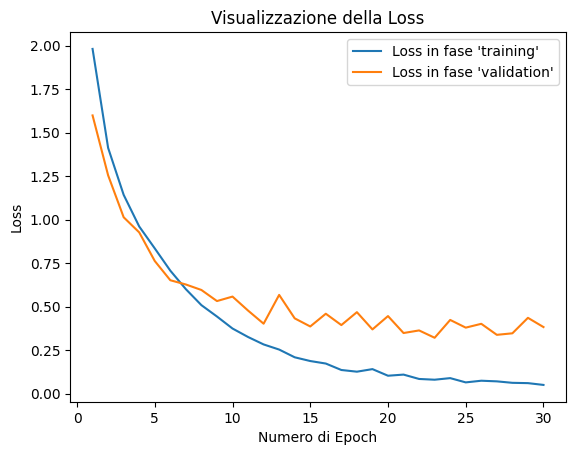

In [81]:
epochs = [i for i in range(1,31)]

plt.plot(epochs, training_history_data['loss'], label="Loss in fase 'training'")
plt.plot(epochs, training_history_data['val_loss'], label="Loss in fase 'validation'")
plt.xlabel("Numero di Epoch")
plt.ylabel("Loss")
plt.title("Visualizzazione della Loss")
plt.legend()
plt.show()

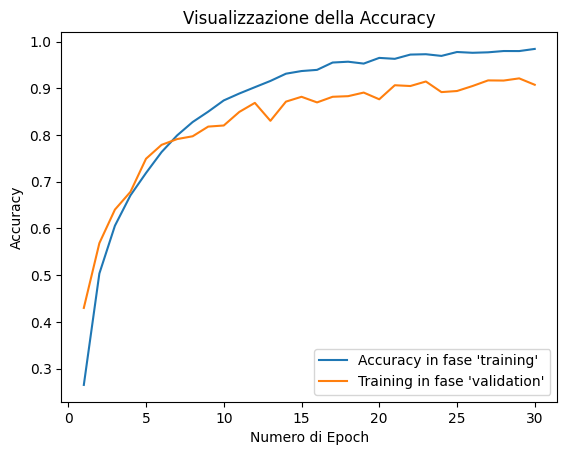

In [82]:
epochs = [i for i in range(1,31)]

plt.plot(epochs, training_history_data['accuracy'], label="Accuracy in fase 'training'")
plt.plot(epochs, training_history_data['val_accuracy'], label="Training in fase 'validation'")
plt.xlabel("Numero di Epoch")
plt.ylabel("Accuracy")
plt.title("Visualizzazione della Accuracy")
plt.legend()
plt.show()

# Precisione, Recall, Matrice di Cofusione - Valutazione del Modello II

In [84]:
X_test.shape

(2995, 150, 150, 1)

In [85]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step


array([[4.4735640e-05, 8.1290910e-04, 8.6430184e-05, ..., 9.8180538e-01,
        4.6029854e-05, 3.9857025e-03],
       [2.9397247e-14, 9.5580515e-17, 4.6443880e-15, ..., 1.4343623e-17,
        1.8955733e-13, 3.3675695e-07],
       [1.3130006e-09, 1.4981759e-09, 4.5502908e-09, ..., 1.1534754e-09,
        3.3675800e-09, 8.4629562e-03],
       ...,
       [9.9975246e-01, 3.6157570e-12, 1.3547097e-04, ..., 1.2484229e-10,
        2.4535103e-09, 2.4537208e-05],
       [7.5592710e-05, 9.9544013e-01, 8.5610554e-05, ..., 2.1311788e-04,
        2.8818598e-04, 6.3740282e-04],
       [9.2909360e-08, 2.7830005e-09, 4.5878252e-08, ..., 8.1852806e-04,
        9.1617490e-05, 4.9405714e-04]], dtype=float32)

In [86]:
y_pred.shape

(2995, 10)

In [89]:
predicted_categories = np.argmax(y_pred, axis=1) # axis 1 necessario all'iterazione verticale, argmax prende la colonna con valore maggiore
predicted_categories

array([7, 6, 6, ..., 0, 1, 4])

In [90]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
Y_test.shape

(2995, 10)

In [93]:
true_categories = np.argmax(Y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [91]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories, predicted_categories)
# F1score precisione di recall
print(classification_report(true_categories, predicted_categories, target_names=classes))

              precision    recall  f1-score   support

       blues       0.95      0.80      0.87       302
   classical       0.93      0.96      0.95       298
     country       0.84      0.86      0.85       317
       disco       0.88      0.94      0.91       312
      hiphop       0.93      0.95      0.94       277
        jazz       0.87      0.95      0.91       311
       metal       0.97      0.97      0.97       302
         pop       0.92      0.89      0.91       289
      reggae       0.97      0.88      0.92       296
        rock       0.84      0.87      0.86       291

    accuracy                           0.91      2995
   macro avg       0.91      0.91      0.91      2995
weighted avg       0.91      0.91      0.91      2995



# Visualizzazione della Matrice di Confusione

In [95]:
cm

array([[241,   1,  21,   7,   0,  16,   0,   1,   1,  14],
       [  1, 287,   1,   0,   0,   9,   0,   0,   0,   0],
       [  4,   2, 273,   8,   0,  12,   0,   3,   1,  14],
       [  0,   3,   1, 294,   4,   0,   0,   3,   2,   5],
       [  1,   0,   0,   1, 262,   1,   2,   8,   1,   1],
       [  0,   6,   6,   0,   1, 297,   0,   0,   0,   1],
       [  0,   0,   2,   0,   2,   1, 292,   0,   0,   5],
       [  4,   4,   5,   2,   6,   3,   0, 258,   3,   4],
       [  3,   1,  10,  10,   2,   3,   2,   2, 260,   3],
       [  0,   4,   7,  12,   4,   0,   4,   5,   1, 254]])

In [109]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: E:\Music Genre Classifier - Progetto Intelligenza Artificiale\Notebook Jupyter\progettoIA\Scripts\python.exe -m pip install --upgrade pip


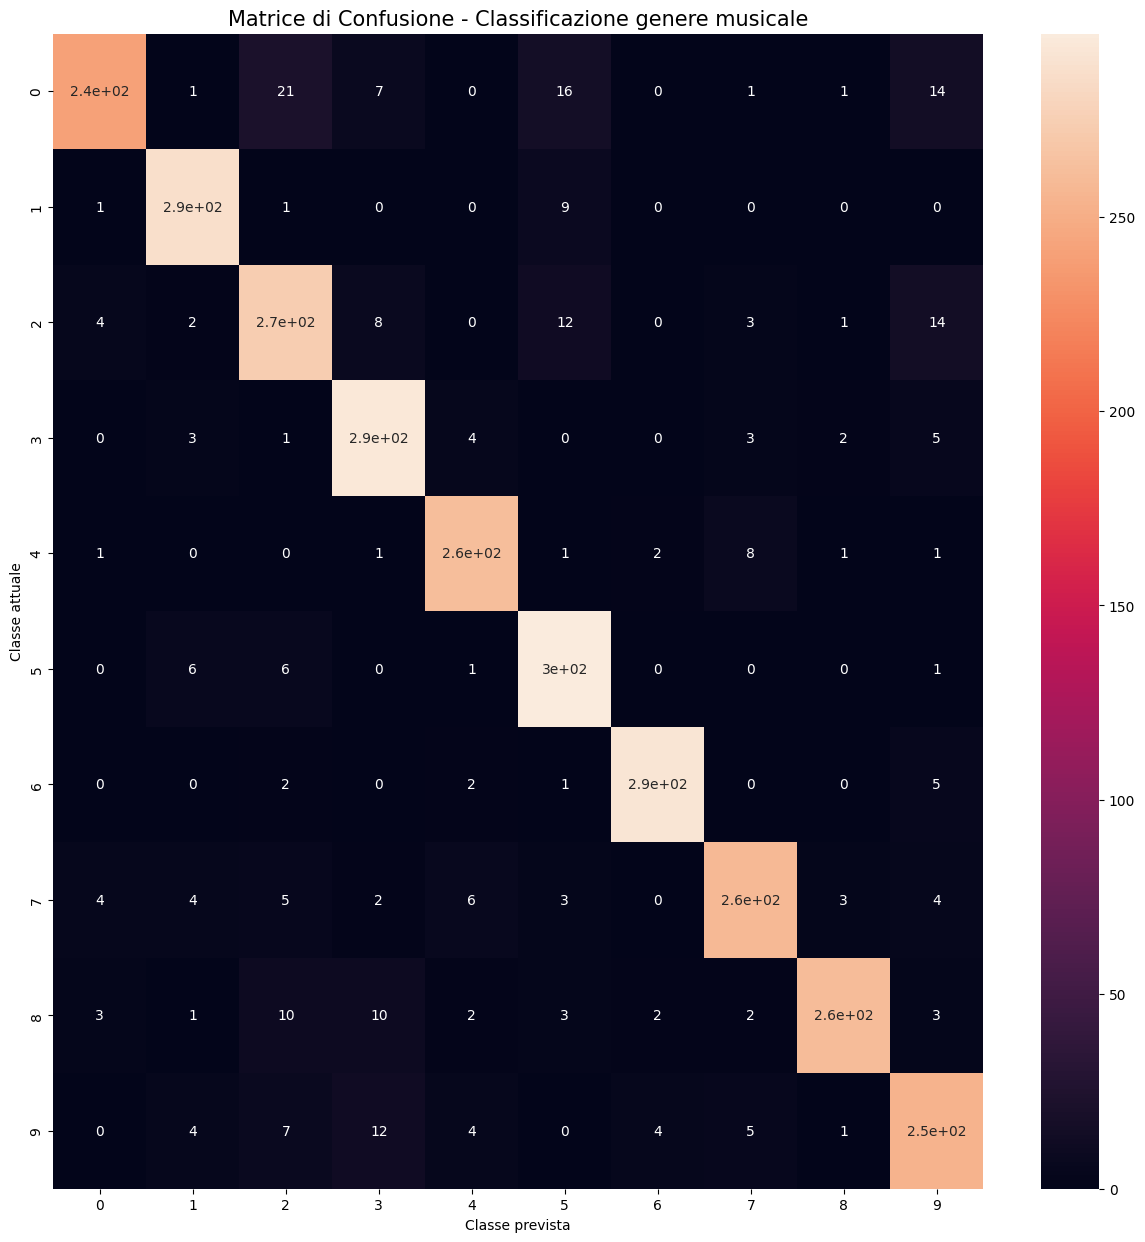

In [117]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, annot_kws={"size":10})
plt.xlabel("Classe prevista", fontsize=10)
plt.ylabel("Classe attuale", fontsize=10)
plt.title("Matrice di Confusione - Classificazione genere musicale", fontsize=15)
plt.show()

In [119]:
print("test")

test
